In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings("ignore")

# Dùng để encoding cho các categorical variables
---
---

# 1. LabelEncoder
## Dùng trong các 1 trong trường hợp:
- Khi biến Input (Predict) là ordinal categorical variable (biến phân loại có thứ tự)
- Khi biến Input (Predict) là category có 2 thuộc tính phân loại
- Khi Output (Target) là categorical variable

## TH1: Category là Target

In [3]:
df1 = sns.load_dataset('iris')
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df1['species'].unique()

'''
dựa vào các field 'sepal_length', 'sepal_width', 'petal_length', 'petal_width' để dự đoán species

'''

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### sử dụng dictionary để thay thế giá trị

In [5]:
iris_species = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
df1['species_encode1'] = df1['species'].map(iris_species)
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_encode1
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [6]:
df1.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,species_encode1
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2
149,5.9,3.0,5.1,1.8,virginica,2


### Sử dụng label encoder

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
# khởi tạo đối tượng Encoder
encoder = LabelEncoder()

In [10]:
# mã hóa thuộc tính
# species_encode2' là 1 cột mới á
df1['species_encode2'] = encoder.fit_transform(df1['species'])

In [11]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_encode2
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [12]:
df1['species_encode2'].unique()

array([0, 1, 2])

In [13]:
df1.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [14]:
'''
nó sẽ sắp xếp species theo thứ tự alpha_B, sau đó gán số vào
có 3 giá trị: 0,1,2 tương ứng với 'setosa', 'versicolor', 'virginica'
'''

"\nnó sẽ sắp xếp species theo thứ tự alpha_B, sau đó gán số vào\ncó 3 giá trị: 0,1,2 tương ứng với 'setosa', 'versicolor', 'virginica'\n"

## TH2: Category là input và chỉ có 2 giá trị

In [15]:
df2 = pd.DataFrame({
    'Name': ['Lucy', 'John', 'Tom', 'Mary', 'Mark'],
    'Gender': ['Female', 'Male', 'Male', 'Female', 'Male'],
    'Age': [24, 29, 21, 30, 27]
})
df2

,Name,Gender,Age
0,Lucy,Female,24
1,John,Male,29
2,Tom,Male,21
3,Mary,Female,30
4,Mark,Male,27


In [16]:
df2['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [17]:
'''
Gender chỉ có 2 giá trị là F và M
'''

'\nGender chỉ có 2 giá trị là F và M\n'

In [18]:
df2['Gender_encode'] = encoder.fit_transform(df2['Gender'])
df2

,Name,Gender,Age,Gender_encode
0,Lucy,Female,24,0
1,John,Male,29,1
2,Tom,Male,21,1
3,Mary,Female,30,0
4,Mark,Male,27,1


## TH3 Category là input và có thứ tự (ordinal categorical variable)

In [19]:
df3 = pd.DataFrame({
    'Name': ['Lucy', 'John', 'Tom', 'Mary', 'Mark'],
    'Gender': ['Female', 'Male', 'Male', 'Female', 'Male'],
    'Place': ['First', 'Third', 'Second', 'Fourth', 'Third'], 
    'Age': [24, 29, 21, 30, 27]
})
df3

,Name,Gender,Place,Age
0,Lucy,Female,First,24
1,John,Male,Third,29
2,Tom,Male,Second,21
3,Mary,Female,Fourth,30
4,Mark,Male,Third,27


In [20]:
df3['Place_encode'] = encoder.fit_transform(df3['Place'])
df3

,Name,Gender,Place,Age,Place_encode
0,Lucy,Female,First,24,0
1,John,Male,Third,29,3
2,Tom,Male,Second,21,2
3,Mary,Female,Fourth,30,1
4,Mark,Male,Third,27,3


In [21]:
'''
do nó sắp xếp theo thứ tự alpha-beta nên sắp xếp nó sẽ mang ý nghĩa kỳ kỳ:))
first - 0; third - 3, second - 2, fourth - 1 
'''

'\ndo nó sắp xếp theo thứ tự alpha-beta nên sắp xếp nó sẽ mang ý nghĩa kỳ kỳ:))\nfirst - 0; third - 3, second - 2, fourth - 1 \n'

In [22]:
### giải phải: tạo 1 temp column để sắp xếp
df3['Place2'] = ['1st', '3rd', '2nd', '4th', '3rd']
df3

,Name,Gender,Place,Age,Place_encode,Place2
0,Lucy,Female,First,24,0,1st
1,John,Male,Third,29,3,3rd
2,Tom,Male,Second,21,2,2nd
3,Mary,Female,Fourth,30,1,4th
4,Mark,Male,Third,27,3,3rd


In [23]:
df3['Place2_encode'] = encoder.fit_transform(df3['Place2'])
df3

,Name,Gender,Place,Age,Place_encode,Place2,Place2_encode
0,Lucy,Female,First,24,0,1st,0
1,John,Male,Third,29,3,3rd,2
2,Tom,Male,Second,21,2,2nd,1
3,Mary,Female,Fourth,30,1,4th,3
4,Mark,Male,Third,27,3,3rd,2


### Truy ngược lại

In [20]:
df3['Place2_decode'] = encoder.inverse_transform(df3['Place2_encode'])
df3

,Name,Gender,Place,Age,Place_encode,Place2,Place2_encode,Place2_decode
0,Lucy,Female,First,24,0,1st,0,1st
1,John,Male,Third,29,3,3rd,2,3rd
2,Tom,Male,Second,21,2,2nd,1,2nd
3,Mary,Female,Fourth,30,1,4th,3,4th
4,Mark,Male,Third,27,3,3rd,2,3rd


### Test: dùng label encoder for nominal categorical variable (biến phân loại ko thứ tự)

In [25]:
df4 = pd.DataFrame({
    'Name': ['Lucy', 'John', 'Tom', 'Mary', 'Mark'],
    'Gender': ['Female', 'Male', 'Male', 'Female', 'Male'],
    'Place': ['First', 'Third', 'Second', 'Fourth', 'Third'], 
    'PlaceOfBirth': ['New Jork', 'London', 'Ha noi', 'Binh duong', 'Dubai'],
    'Age': [24, 29, 21, 30, 27]
})
df4

,Name,Gender,Place,PlaceOfBirth,Age
0,Lucy,Female,First,New Jork,24
1,John,Male,Third,London,29
2,Tom,Male,Second,Ha noi,21
3,Mary,Female,Fourth,Binh duong,30
4,Mark,Male,Third,Dubai,27


In [26]:
df4['PlaceOfBirth_encode'] = encoder.fit_transform(df4['PlaceOfBirth'])
df4

,Name,Gender,Place,PlaceOfBirth,Age,PlaceOfBirth_encode
0,Lucy,Female,First,New Jork,24,4
1,John,Male,Third,London,29,3
2,Tom,Male,Second,Ha noi,21,2
3,Mary,Female,Fourth,Binh duong,30,0
4,Mark,Male,Third,Dubai,27,1


In [27]:
# vấn đề: từ thuộc tính không có thứ tự (PlaceOfBirth) -> chuyển thành có thứ tự
# -> model hiểu nhầm về thứ tự ưu tiên của dữ liệu
# binh duong có tầm quan trọng cao nhất, new york có tầm quan trong thấp nhất (cái này sai)

# One Hot Encoder và Dummy Encoder
- Dùng cho các trường hợp còn lại của label encoder:
    - Input ko phải là ordinal (là nominal)
    - Input chứa 3 giá trị unique trở lên
    - output ko phải là categirical variable

# One Hot Encoder 

- dùng khi nếu muốn truy ngược lại dữ liệu

In [42]:
df = pd.DataFrame({
    'Name': ['Lucy', 'John', 'Tom', 'Mary', 'Mark'],
    'PlaceOfBirth': ['NewYork', 'London', 'HaNoi', 'BinhDuong', 'Dubai'],
    'Age': [24, 29, 21, 30, 27]
})
df

,Name,PlaceOfBirth,Age
0,Lucy,NewYork,24
1,John,London,29
2,Tom,HaNoi,21
3,Mary,BinhDuong,30
4,Mark,Dubai,27


In [43]:
df['PlaceOfBirth'].unique()

array(['NewYork', 'London', 'HaNoi', 'BinhDuong', 'Dubai'], dtype=object)

In [44]:
# PlaceOfBirth là biến category có unique values > 3

In [45]:
from sklearn.preprocessing import OneHotEncoder

In [46]:
# khởi tạo encoder
encoder = OneHotEncoder()

In [47]:
# mã hóa thuộc tính
df_encode = encoder.fit_transform(df[['PlaceOfBirth']]).toarray() # truyền zô dataframe nhaaa
df_encode

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [48]:
'''
kết quả trả về 1 array với các giá trị nhị phân (0,1) 
'''

'\nkết quả trả về 1 array với các giá trị nhị phân (0,1) \n'

In [49]:
# xem các giá trị của encoder
encoder.categories_

[array(['BinhDuong', 'Dubai', 'HaNoi', 'London', 'NewYork'], dtype=object)]

In [50]:
'''
sắp xếp theo thứ tự alpha-b
'''

'\nsắp xếp theo thứ tự alpha-b\n'

In [51]:
# chuyển về dataframe
df_encode = pd.DataFrame(df_encode, columns = encoder.categories_[0])
df_encode

,BinhDuong,Dubai,HaNoi,London,NewYork
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0


In [52]:
# gộp lại df ban đầu

df_new3 = pd.concat([df, df_encode], axis=1)
df_new3

,Name,PlaceOfBirth,Age,BinhDuong,Dubai,HaNoi,London,NewYork
0,Lucy,NewYork,24,0.0,0.0,0.0,0.0,1.0
1,John,London,29,0.0,0.0,0.0,1.0,0.0
2,Tom,HaNoi,21,0.0,0.0,1.0,0.0,0.0
3,Mary,BinhDuong,30,1.0,0.0,0.0,0.0,0.0
4,Mark,Dubai,27,0.0,1.0,0.0,0.0,0.0


In [59]:
# để tránh bị trùng tên cột á

#để tránh trùng cột -> thêm tiền tố ở trước các cột mới tạo

In [54]:
df_encode2 = encoder.fit_transform(df['PlaceOfBirth'].values.reshape(-1,1)).toarray()
df_encode2

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [56]:
# thêm place zô
# chuyển về dataframe
df_encode2 = pd.DataFrame(df_encode2, 
                          columns = ['place_' + i for i in encoder.categories_[0]])
df_encode2

,place_BinhDuong,place_Dubai,place_HaNoi,place_London,place_NewYork
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0


In [58]:
df_new2 = pd.concat([df, df_encode2], axis = 1)
df_new2

,Name,PlaceOfBirth,Age,place_BinhDuong,place_Dubai,place_HaNoi,place_London,place_NewYork
0,Lucy,NewYork,24,0.0,0.0,0.0,0.0,1.0
1,John,London,29,0.0,0.0,0.0,1.0,0.0
2,Tom,HaNoi,21,0.0,0.0,1.0,0.0,0.0
3,Mary,BinhDuong,30,1.0,0.0,0.0,0.0,0.0
4,Mark,Dubai,27,0.0,1.0,0.0,0.0,0.0


In [61]:
### Trường hợp bỏ bớt 1 column

In [60]:
df_encode2 = df_encode2.drop(['place_BinhDuong'], axis = 1)

In [62]:
df_new3 = pd.concat([df, df_encode2], axis = 1)
df_new3

,Name,PlaceOfBirth,Age,place_Dubai,place_HaNoi,place_London,place_NewYork
0,Lucy,NewYork,24,0.0,0.0,0.0,1.0
1,John,London,29,0.0,0.0,1.0,0.0
2,Tom,HaNoi,21,0.0,1.0,0.0,0.0
3,Mary,BinhDuong,30,0.0,0.0,0.0,0.0
4,Mark,Dubai,27,1.0,0.0,0.0,0.0


In [67]:
'''
=> vẫn đủ data
'''

'\n=> vẫn đủ data\n'

### Bỏ bớt cột đầu tiên khi mã hóa

In [63]:
# khởi tạo encoder
encoder2 = OneHotEncoder(drop='first')

In [64]:
# mã hóa 
df_encode = encoder2.fit_transform(df[['PlaceOfBirth']]).toarray()
df_encode

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [65]:
encoder2.categories_

[array(['BinhDuong', 'Dubai', 'HaNoi', 'London', 'NewYork'], dtype=object)]

In [70]:
# chuyển về DataFrame
df_encode = pd.DataFrame(df_encode, 
                         columns=['place_' + i for i in encoder2.categories_[0][1:]])
df_encode

,place_Dubai,place_HaNoi,place_London,place_NewYork
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [68]:
'''
chỉ return về 4 cột do đã bỏ cột BinhDuong đi rồii
'''

'\nchỉ return về 4 cột do đã bỏ cột BinhDuong đi rồii\n'

In [71]:
df_new3 = pd.concat([df, df_encode], axis=1)
df_new3

,Name,PlaceOfBirth,Age,place_Dubai,place_HaNoi,place_London,place_NewYork
0,Lucy,NewYork,24,0.0,0.0,0.0,1.0
1,John,London,29,0.0,0.0,1.0,0.0
2,Tom,HaNoi,21,0.0,1.0,0.0,0.0
3,Mary,BinhDuong,30,0.0,0.0,0.0,0.0
4,Mark,Dubai,27,1.0,0.0,0.0,0.0


In [72]:
'''
PlaceOfBirth thừa => bỏ column này
'''

'\nPlaceOfBirth thừa => bỏ column này\n'

In [73]:
df_new3.drop(['PlaceOfBirth'], axis=1, inplace=True)
df_new3

,Name,Age,place_Dubai,place_HaNoi,place_London,place_NewYork
0,Lucy,24,0.0,0.0,0.0,1.0
1,John,29,0.0,0.0,1.0,0.0
2,Tom,21,0.0,1.0,0.0,0.0
3,Mary,30,0.0,0.0,0.0,0.0
4,Mark,27,1.0,0.0,0.0,0.0


### Truy ngược lại

In [75]:
df_new3['PlaceOfBirth_decode'] = encoder2.inverse_transform(df_new3[['place_Dubai', 'place_HaNoi', 'place_London', 'place_NewYork']])
df_new3

,Name,Age,place_Dubai,place_HaNoi,place_London,place_NewYork,PlaceOfBirth_decode
0,Lucy,24,0.0,0.0,0.0,1.0,NewYork
1,John,29,0.0,0.0,1.0,0.0,London
2,Tom,21,0.0,1.0,0.0,0.0,HaNoi
3,Mary,30,0.0,0.0,0.0,0.0,BinhDuong
4,Mark,27,1.0,0.0,0.0,0.0,Dubai


In [76]:
'''
truy ngược lại vẫn đủ data do categories_ vẫn chứa BinhDuong
'''

'\ntruy ngược lại vẫn đủ data do categories_ vẫn chứa BinhDuong\n'

# Dùng Dummy encoder
- xử lý đơn giản hơn so với OneHotEncoder
- nhưng dummy ko truy ngược dc (sẽ phức tạp hơn):))

In [78]:
df = pd.DataFrame({
    'Name': ['Lucy', 'John', 'Tom', 'Mary', 'Mark'],
    'PlaceOfBirth': ['NewJork', 'London', 'HaNoi', 'BinhDuong', 'Dubai'],
    'Age': [24, 29, 21, 30, 27]
})
df

,Name,PlaceOfBirth,Age
0,Lucy,NewJork,24
1,John,London,29
2,Tom,HaNoi,21
3,Mary,BinhDuong,30
4,Mark,Dubai,27


### dùng dummy nè

In [79]:
df_new1 = pd.get_dummies(data=df, columns=['PlaceOfBirth'], prefix='place')
df_new1

,Name,Age,place_BinhDuong,place_Dubai,place_HaNoi,place_London,place_NewJork
0,Lucy,24,0,0,0,0,1
1,John,29,0,0,0,1,0
2,Tom,21,0,0,1,0,0
3,Mary,30,1,0,0,0,0
4,Mark,27,0,1,0,0,0


### Bỏ đi cột đầu tiên

In [80]:
df_new2 = pd.get_dummies(data=df, columns=['PlaceOfBirth'], prefix='place', drop_first=True)
df_new2

,Name,Age,place_Dubai,place_HaNoi,place_London,place_NewJork
0,Lucy,24,0,0,0,1
1,John,29,0,0,1,0
2,Tom,21,0,1,0,0
3,Mary,30,0,0,0,0
4,Mark,27,1,0,0,0


In [81]:
df2 = pd.DataFrame({
    'Name': ['Lucy', 'John', 'Tom', 'Mary', 'Mark'],
    'Sex': ['Female', 'Male', 'Other', 'Female', 'Male'],
    'PlaceOfBirth': ['NewJork', 'London', 'HaNoi', 'BinhDuong', 'Dubai'],
    'Age': [24, 29, 21, 30, 27]
})
df2

,Name,Sex,PlaceOfBirth,Age
0,Lucy,Female,NewJork,24
1,John,Male,London,29
2,Tom,Other,HaNoi,21
3,Mary,Female,BinhDuong,30
4,Mark,Male,Dubai,27


In [83]:
'''
Sex và PlaceOfBirth là 2 thuộc tính phân loại có 3 feature trở lên
'''

'\nSex và PlaceOfBirth là 2 thuộc tính phân loại có 3 feature trở lên\n'

In [87]:
# bỏ cột đầu tiên cho gọn
df_new3 = pd.get_dummies(data=df2, columns=['Sex', 'PlaceOfBirth'], 
                         prefix=['S', 'P'], 
                         drop_first=True)
df_new3

,Name,Age,S_Male,S_Other,P_Dubai,P_HaNoi,P_London,P_NewJork
0,Lucy,24,0,0,0,0,0,1
1,John,29,1,0,0,0,1,0
2,Tom,21,0,1,0,1,0,0
3,Mary,30,0,0,0,0,0,0
4,Mark,27,1,0,1,0,0,0


# Uncommon Category
- dùng cho tập input có nhiều unique values (feature) và có 1 nhóm feature chiếm tỉ lệ nhỏ 

In [101]:
df = pd.read_csv('data/Combined_DS_v10.csv')
df.head()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,South Africa,NaN,Git,21,13,Male,NaN
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,"70,841.00"
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,Sweeden,8.0,Git,45,11,NaN,NaN
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,"21,426.00"
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,UK,8.0,Git,39,7,Male,"£41,671.00"


In [102]:
countries = df['Country']
country_count = countries.value_counts()
country_count

South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Russia           97
UK               95
India            95
Ukraine           9
Ireland           5
Name: Country, dtype: int64

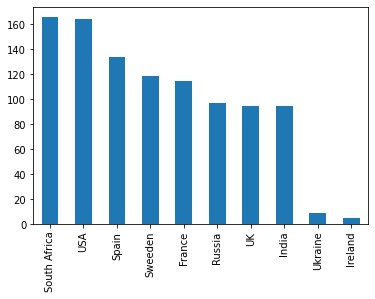

In [103]:
df['Country'].value_counts().plot.bar()
plt.show()

In [104]:
country_count[country_count < 10].index

Index(['Ukraine', 'Ireland'], dtype='object')

In [105]:
'''
Ukraine và Ireland chiếm tỉ lệ rất thấp trong mẫu 
'''

'\nUkraine và Ireland chiếm tỉ lệ rất thấp trong mẫu \n'

In [106]:
'''
lấy các records có country là Ukraine và Ireland
'''
mask = countries.isin(country_count[country_count < 10].index)
mask

0      False
1      False
2      False
3      False
4      False
       ...  
994    False
995    False
996    False
997    False
998    False
Name: Country, Length: 999, dtype: bool

In [107]:
'''
những records nào True thì thay = Order
'''
countries[mask] = 'Other'

In [108]:
countries.value_counts()

South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Russia           97
UK               95
India            95
Other            14
Name: Country, dtype: int64

In [109]:
df['Country'].value_counts()

South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Russia           97
UK               95
India            95
Other            14
Name: Country, dtype: int64

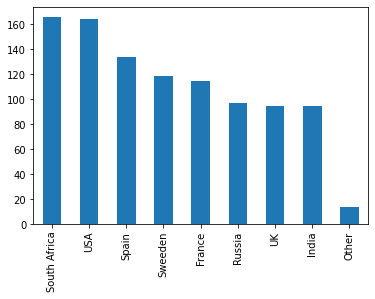

In [110]:
df['Country'].value_counts().plot.bar()
plt.show()

# Binarizing column
- chỉ quan tâm tới ngưỡng, ko quan tậm giá trị cụ thể

In [111]:
df = pd.read_csv('data/Combined_DS_v10.csv')
df.head()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,South Africa,NaN,Git,21,13,Male,NaN
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,"70,841.00"
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,Sweeden,8.0,Git,45,11,NaN,NaN
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,"21,426.00"
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,UK,8.0,Git,39,7,Male,"£41,671.00"


In [112]:
'''
vd: chỉ quan tâm xem có phải trả tiền hay ko, ko quan tâm là trả bao nhiêu tiền
'''

'\nvd: chỉ quan tâm xem có phải trả tiền hay ko, ko quan tâm là trả bao nhiêu tiền\n'

In [114]:
df['Paid_Job'] = 0
df[['Paid_Job', 'ConvertedSalary']].head()

,Paid_Job,ConvertedSalary
0,0,NaN
1,0,70841.0
2,0,NaN
3,0,21426.0
4,0,41671.0


In [116]:
df.loc[df['ConvertedSalary'] >0, 'Paid_Job'] =1

In [117]:
df[['Paid_Job', 'ConvertedSalary']].head()

,Paid_Job,ConvertedSalary
0,0,NaN
1,1,70841.0
2,0,NaN
3,1,21426.0
4,1,41671.0


# Binning Values

### Chia khoảng bằng nhauuu

In [119]:
#chia cột ConvertedSalary thành 5 khoảng bằng nhau
df['Equal_bin'] = pd.cut(df['ConvertedSalary'], bins = 5)
df[['Equal_bin', 'ConvertedSalary']].head()

,Equal_bin,ConvertedSalary
0,NaN,NaN
1,"(-2000.0, 400000.0]",70841.0
2,NaN,NaN
3,"(-2000.0, 400000.0]",21426.0
4,"(-2000.0, 400000.0]",41671.0


In [120]:
df['Equal_bin'].unique()

[NaN, (-2000.0, 400000.0], (800000.0, 1200000.0], (400000.0, 800000.0], (1600000.0, 2000000.0]]
Categories (5, interval[float64, right]): [(-2000.0, 400000.0] < (400000.0, 800000.0] < (800000.0, 1200000.0] < (1200000.0, 1600000.0] < (1600000.0, 2000000.0]]

In [121]:
df['Equal_bin'].value_counts()

(-2000.0, 400000.0]       645
(800000.0, 1200000.0]       9
(400000.0, 800000.0]        6
(1600000.0, 2000000.0]      5
(1200000.0, 1600000.0]      0
Name: Equal_bin, dtype: int64

In [122]:
df['ConvertedSalary'].min(), df['ConvertedSalary'].max()

(0.0, 2000000.0)

In [123]:
df['ConvertedSalary'].min() - df['ConvertedSalary'].max() * 0.001

-2000.0